In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import math

# Data Import

In [3]:
games_df = pd.read_csv('data/games.csv')
player_play_df = pd.read_csv('data/player_play.csv')
players_df = pd.read_csv('data/players.csv')
plays_df = pd.read_csv('data/plays.csv')

In [4]:

# Tracking data
tracking_df1 = pd.read_csv('data/tracking_week_1.csv')

'''acking_df2 = pd.read_csv('data/tracking_week_2.csv')
tracking_df3 = pd.read_csv('data/tracking_week_3.csv')
tracking_df4 = pd.read_csv('data/tracking_week_4.csv')
tracking_df5 = pd.read_csv('data/tracking_week_5.csv')
tracking_df6 = pd.read_csv('data/tracking_week_6.csv')
tracking_df7 = pd.read_csv('data/tracking_week_7.csv')
tracking_df8 = pd.read_csv('data/tracking_week_8.csv')
tracking_df9 = pd.read_csv('data/tracking_week_9.csv')
'''

"acking_df2 = pd.read_csv('data/tracking_week_2.csv')\ntracking_df3 = pd.read_csv('data/tracking_week_3.csv')\ntracking_df4 = pd.read_csv('data/tracking_week_4.csv')\ntracking_df5 = pd.read_csv('data/tracking_week_5.csv')\ntracking_df6 = pd.read_csv('data/tracking_week_6.csv')\ntracking_df7 = pd.read_csv('data/tracking_week_7.csv')\ntracking_df8 = pd.read_csv('data/tracking_week_8.csv')\ntracking_df9 = pd.read_csv('data/tracking_week_9.csv')\n"

# Data Preprocessing

In [5]:
bills_defensive_player_plays = player_play_df[(player_play_df['teamAbbr'] == 'BUF') & (player_play_df['wasInitialPassRusher'].notna())]
bills_defensive_player_plays.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
220,2022090800,364,37075,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,2022090800,364,40107,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4IR,43399.0,NaN
222,2022090800,364,40166,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2L,44881.0,NaN
223,2022090800,364,41341,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,2022090800,364,44976,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CFR,47853.0,NaN


In [6]:
# Get unique play ids from bills defensive player plays
# perchance remove fumbles? might affect yards gained calculation
bills_defensive_play_ids = bills_defensive_player_plays['playId'].unique()
bills_defensive_plays  = plays_df[plays_df['playId'].isin(bills_defensive_play_ids) & (plays_df['defensiveTeam'] == 'BUF')]

bills_defensive_pass_plays = bills_defensive_plays[bills_defensive_plays['passResult'].notna()]
bills_defensive_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
21,2022100202,3292,(11:13) (Shotgun) L.Jackson scrambles left end...,4,2,13,BAL,BUF,BAL,29,...,5,-0.005294,0.005294,-0.047659,True,NaN,NaN,0,Cover 6-Left,Zone
41,2022092503,1755,(2:00) 5-T. Bridgewater in at QB. (Shotgun) T....,2,1,10,MIA,BUF,MIA,44,...,0,-0.002589,0.002589,-0.372914,True,NaN,NaN,0,Quarters,Zone
160,2022100901,2020,(:56) (Shotgun) K.Pickett pass short right to ...,2,1,10,PIT,BUF,PIT,27,...,5,0.000184,-0.000184,-0.417566,True,NaN,NaN,0,Cover-2,Zone
248,2022101610,420,(7:29) (Shotgun) P.Mahomes pass short left to ...,1,1,10,KC,BUF,BUF,34,...,3,-0.017118,0.017118,-0.205594,True,UNDEFINED,NaN,0,Quarters,Zone
309,2022100901,3933,(2:00) (Shotgun) K.Pickett pass incomplete sho...,4,2,6,PIT,BUF,BUF,18,...,0,-0.000032,0.000032,-0.387086,True,NaN,NaN,0,Cover-2,Zone


In [7]:
# split football field into sectors
# x axis is 20 sections along the length of the field(each 5 yards) and the y axis is 4 sections each 13.325 yards along the width

In [8]:
# find where BUF is contained in the row
# Assuming df is your DataFrame
buf_games = games_df[games_df.applymap(lambda x: 'BUF' in str(x)).any(axis=1)]

# Display the rows
buf_games.head()

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_68497/1652034794.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  buf_games = games_df[games_df.applymap(lambda x: 'BUF' in str(x)).any(axis=1)]


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
30,2022091900,2022,2,9/19/2022,19:15:00,BUF,TEN,41,7
36,2022092503,2022,3,9/25/2022,13:00:00,MIA,BUF,21,19
51,2022100202,2022,4,10/2/2022,13:00:00,BAL,BUF,20,23
66,2022100901,2022,5,10/9/2022,13:00:00,BUF,PIT,38,3


In [9]:
# yards gained = prePenaltyYardsGained
# pass completion percentage = out of all pass plays
# tracking location for pass: where its caught (pass_outcome_caught)
# tracking location for run: where tackle is made (tackle)

# dataframe of locations for all bills defensive players or football for every play
bills_defensive_tracking1 = tracking_df1[
    (tracking_df1['gameId'].isin(buf_games['gameId'])) &
    (tracking_df1['playId'].isin(bills_defensive_play_ids)) &
    (tracking_df1['event'] == 'tackle') &
    ((tracking_df1['club'] == 'BUF') | (tracking_df1['club'] == 'football'))
]
bills_defensive_tracking1.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6734892,2022090800,414,37075.0,Von Miller,95,AFTER_SNAP,2022-09-09 00:36:27.1,40.0,BUF,right,55.01,22.14,4.67,1.21,0.47,119.42,130.43,tackle
6734991,2022090800,414,40107.0,Micah Hyde,95,AFTER_SNAP,2022-09-09 00:36:27.1,23.0,BUF,right,77.11,20.08,6.92,1.56,0.70,171.38,171.32,tackle
6735090,2022090800,414,40166.0,Jordan Poyer,95,AFTER_SNAP,2022-09-09 00:36:27.1,21.0,BUF,right,71.17,8.96,6.69,1.86,0.68,193.51,190.28,tackle
6735288,2022090800,414,42395.0,Jordan Phillips,95,AFTER_SNAP,2022-09-09 00:36:27.1,97.0,BUF,right,63.17,4.84,5.52,3.03,0.58,164.42,141.92,tackle
6735684,2022090800,414,44976.0,Matt Milano,95,AFTER_SNAP,2022-09-09 00:36:27.1,58.0,BUF,right,62.35,3.08,6.51,1.83,0.66,134.62,143.90,tackle


In [29]:
# For each row, determine which sector the player/football is in
# 0-19 for x, 0-3 for y
def get_sector(x, y):
    return (int(x / 10), int(y / 13.325))

bills_defensive_tracking1['sector'] = bills_defensive_tracking1.apply(lambda row: get_sector(row['x'], row['y']), axis=1)
bills_defensive_tracking1.head()

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_68497/3335759163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bills_defensive_tracking1['sector'] = bills_defensive_tracking1.apply(lambda row: get_sector(row['x'], row['y']), axis=1)


,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,sector
6734892,2022090800,414,37075.0,Von Miller,95,AFTER_SNAP,2022-09-09 00:36:27.1,40.0,BUF,right,55.01,22.14,4.67,1.21,0.47,119.42,130.43,tackle,"(5, 1)"
6734991,2022090800,414,40107.0,Micah Hyde,95,AFTER_SNAP,2022-09-09 00:36:27.1,23.0,BUF,right,77.11,20.08,6.92,1.56,0.70,171.38,171.32,tackle,"(7, 1)"
6735090,2022090800,414,40166.0,Jordan Poyer,95,AFTER_SNAP,2022-09-09 00:36:27.1,21.0,BUF,right,71.17,8.96,6.69,1.86,0.68,193.51,190.28,tackle,"(7, 0)"
6735288,2022090800,414,42395.0,Jordan Phillips,95,AFTER_SNAP,2022-09-09 00:36:27.1,97.0,BUF,right,63.17,4.84,5.52,3.03,0.58,164.42,141.92,tackle,"(6, 0)"
6735684,2022090800,414,44976.0,Matt Milano,95,AFTER_SNAP,2022-09-09 00:36:27.1,58.0,BUF,right,62.35,3.08,6.51,1.83,0.66,134.62,143.90,tackle,"(6, 0)"


# Heat Maps

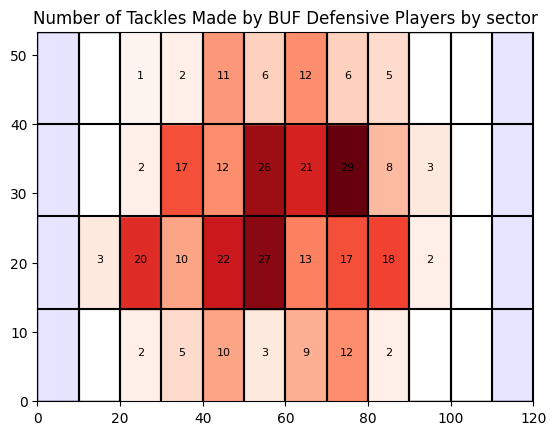

In [34]:
# Get the count of each sector
defensive_sector_count = bills_defensive_tracking1.groupby('sector').size()

# Normalize the counts to range between 0 and 1
norm = plt.Normalize(defensive_sector_count.min(), defensive_sector_count.max())

# show background of football field
# img = mpimg.imread('football_field.png')
# plt.imshow(img, zorder=0, extent=[0, 120, 0, 53.3])

# Create a football field
fig, ax = plt.subplots()
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.add_patch(patches.Rectangle((0, 0), 120, 53.3, fill=False))

# Draw yard lines
for i in range(1, 11):
    ax.plot([10 * i, 10 * i], [0, 53.3], color='black')

# Draw end zones
ax.add_patch(patches.Rectangle((0, 0), 10, 53.3, fill=True, color='blue', alpha=0.1))
ax.add_patch(patches.Rectangle((110, 0), 10, 53.3, fill=True, color='blue', alpha=0.1))

# Draw sector lines
for i in range(1, 24):
    ax.plot([10 * i, 10 * i], [0, 53.3], color='black')

for i in range(1, 4):
    ax.plot([0, 120], [13.325 * i, 13.325 * i], color='black')

# Draw sector averages with color gradient
cmap = plt.cm.Reds  # Choose a color map; 'Blues' for lighter to darker blue gradient
for sector, count in defensive_sector_count.items():
    x = sector[0] * 10
    y = sector[1] * 13.325
    color = cmap(norm(count))  # Get color based on normalized count
    ax.add_patch(patches.Rectangle((x, y), 10, 13.325, color=color))
    ax.text(x + 5, y + 6.6625, str(count), color='black', fontsize=8, ha='center', zorder=2)

plt.title('Number of Tackles Made by BUF Defensive Players by sector')
plt.show()

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_68497/557406145.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  defensive_sector_yards = bills_defensive_tracking1.groupby('sector').apply(lambda group: bills_defensive_plays[


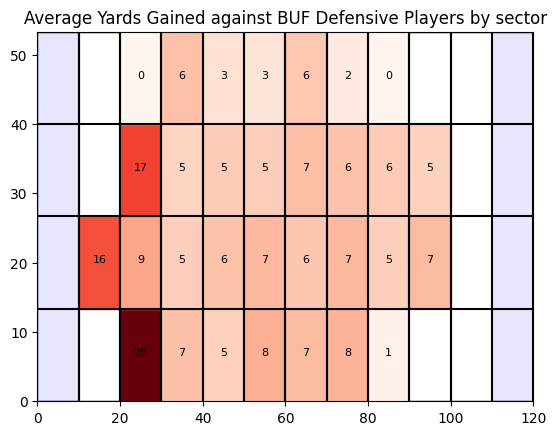

In [33]:
# Go through the bills_defensive_tracking1 and find the matching gameid and playid in the bills_defensive_plays dataframe
# For each sector in the tracking data find the average number of yards gained in the corresponding play in the plays dataframe
# Plot the sectors on the field with the color gradient representing the average yards gained in that sector

defensive_sector_yards = bills_defensive_tracking1.groupby('sector').apply(lambda group: bills_defensive_plays[
    (bills_defensive_plays['gameId'].isin(group['gameId'])) &
    (bills_defensive_plays['playId'].isin(group['playId']))
]['yardsGained'].mean())

norm = plt.Normalize(defensive_sector_yards.min(), defensive_sector_yards.max())

fig, ax = plt.subplots()
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.add_patch(patches.Rectangle((0, 0), 120, 53.3, fill=False))

for i in range(1, 11):
    ax.plot([10 * i, 10 * i], [0, 53.3], color='black')

ax.add_patch(patches.Rectangle((0, 0), 10, 53.3, fill=True, color='blue', alpha=0.1))
ax.add_patch(patches.Rectangle((110, 0), 10, 53.3, fill=True, color='blue', alpha=0.1))

for i in range(1, 24):
    ax.plot([10 * i, 10 * i], [0, 53.3], color='black')

for i in range(1, 4):
    ax.plot([0, 120], [13.325 * i, 13.325 * i], color='black')

cmap = plt.cm.Reds
for sector, yards in defensive_sector_yards.items():
    if not np.isnan(yards):  # Check if yards is not NaN
        x = sector[0] * 10
        y = sector[1] * 13.325
        color = cmap(norm(yards))
        ax.add_patch(patches.Rectangle((x, y), 10, 13.325, color=color))
        ax.text(x + 5, y + 6.6625, f'{int(round(yards))}', color='black', fontsize=8, ha='center')

plt.title('Average Yards Gained against BUF Defensive Players by sector')
plt.show()

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_68497/4228257659.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  defensive_sector_pass_completion = bills_defensive_tracking1.groupby('sector').apply(lambda group: bills_defensive_plays[


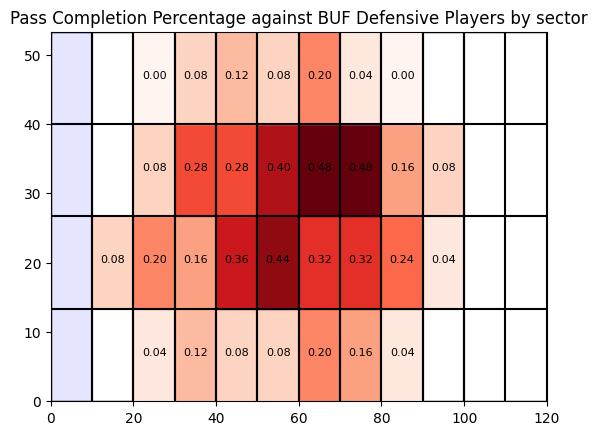

In [35]:
# Go through the bills_defensive_tracking1 and find the matching gameid and playid in the bills_defensive_plays dataframe
# For each sector in the tracking data calculate the pass completion percentage in the corresponding play in the plays dataframe
# Plot the sectors on the field with the color gradient representing the pass completion percentage in that sector

defensive_sector_pass_completion = bills_defensive_tracking1.groupby('sector').apply(lambda group: bills_defensive_plays[
    (bills_defensive_plays['gameId'].isin(group['gameId'])) &
    (bills_defensive_plays['playId'].isin(group['playId'])) &
    (bills_defensive_plays['passResult'] == 'C')
].shape[0] / bills_defensive_plays[
    (bills_defensive_plays['gameId'].isin(bills_defensive_tracking1['gameId'])) &
    (bills_defensive_plays['playId'].isin(bills_defensive_tracking1['playId'])) &
    (bills_defensive_plays['passResult'].notna())
].shape[0])

norm = plt.Normalize(defensive_sector_pass_completion.min(), defensive_sector_pass_completion.max())

fig, ax = plt.subplots()
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.add_patch(patches.Rectangle((0, 0), 120, 53.3, fill=False))

for i in range(1, 11):
    ax.plot([10 * i, 10 * i], [0, 53.3], color='black')

ax.add_patch(patches.Rectangle((0, 0), 10, 53.3, fill=True, color='blue', alpha=0.1))

for i in range(1, 24):
    ax.plot([10 * i, 10 * i], [0, 53.3], color='black')

for i in range(1, 4):
    ax.plot([0, 120], [13.325 * i, 13.325 * i], color='black')

cmap = plt.cm.Reds
for sector, completion in defensive_sector_pass_completion.items():
    x = sector[0] * 10
    y = sector[1] * 13.325
    color = cmap(norm(completion))
    ax.add_patch(patches.Rectangle((x, y), 10, 13.325, color=color))
    ax.text(x + 5, y + 6.6625, f'{completion:.2f}', color='black', fontsize=8, ha='center')

plt.title('Pass Completion Percentage against BUF Defensive Players by sector')
plt.show()

# Isolated Weakness Metric